# Padding - MNIST 손글씨 - CNN v4


 - **Padded 2 Conv2D layers** ver.4
 - 1 MaxPooling2D layer     ver.2
 - 1 Dropout(0.25) layer    ver.3
 - 1 Fully Connected Network layer
 - 1 Dropout(0.5) layer     ver.3
 - 1 Output layer

In [12]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [13]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
# X data: 0-1 사이의 값, 3차원 ==> 4차원
X_train = X_train.reshape(-1,28,28,1) / 255.
X_test = X_test.reshape(-1,28,28,1) / 255.

In [15]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

- 모델 정의, 설정, 학습, 평가

In [5]:
# ver 변화 볼수 있도록.
from tensorflow.keras.models import Sequential, load_model  # origin
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D  # ver.2 ## 맥스풀링 새로 들어와. 
from tensorflow.keras.layers import Dropout                               # ver.3 ## 드롭아웃 새로. 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [16]:
# del model

In [7]:
# padding='same' / 
model = Sequential([
    Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(28, 28, 1), activation='relu'),  # 패딩
    Conv2D(64, (3,3), padding='same',  activation='relu'),   # 패딩
    MaxPooling2D( ),   # 절반으로 줄이기 # MaxPooling(pool_size(2,2))
    Dropout(0.25),     # 풀링되는 레이어 플래튼 사이에 1/4 사분의 일의 노드를 버림.
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),      # 512 와, 출력층 절반의 노드를 버림. 근데 이 덴스 순서가 정말 층 순서대로 노드를 버리나? 내부적 동작 확인 할 길 있어?
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 512)               6423040   
                                                        

-  dense 2의 파라미터 확줄어들어
-  드롭아웃 후에는 뭘 관찰해야 되나?
- 패딩 이후 첫째줄 28 28 인듯?  둘째 줄도  28 28 

CNN - v1 버전과 비교

In [1]:
# Model: "sequential"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
#  conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
#  max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
#  )                                                               
                                                                 
#  flatten (Flatten)           (None, 9216)              0         
                                                                 
#  dense (Dense)               (None, 512)               4719104   
                                                                 
#  dense_1 (Dense)             (None, 10)                5130      
                                                                 
# =================================================================
# Total params: 4,743,050
# Trainable params: 4,743,050
# Non-trainable params: 0
# ________________________________

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model_path = 'best-mnist-cnn-v4.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

In [10]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200,
    callbacks=[checkpoint, early_stop], verbose=0
)
# 처음에는 GPU 선착때문에 시간이 걸리나 그후엔 고속으로 돌아가


Epoch 00001: val_loss improved from inf to 0.05646, saving model to best-mnist-cnn-v4.h5

Epoch 00002: val_loss improved from 0.05646 to 0.04856, saving model to best-mnist-cnn-v4.h5

Epoch 00003: val_loss improved from 0.04856 to 0.04151, saving model to best-mnist-cnn-v4.h5

Epoch 00004: val_loss improved from 0.04151 to 0.03545, saving model to best-mnist-cnn-v4.h5

Epoch 00005: val_loss did not improve from 0.03545

Epoch 00006: val_loss improved from 0.03545 to 0.03394, saving model to best-mnist-cnn-v4.h5

Epoch 00007: val_loss did not improve from 0.03394

Epoch 00008: val_loss did not improve from 0.03394

Epoch 00009: val_loss did not improve from 0.03394

Epoch 00010: val_loss did not improve from 0.03394

Epoch 00011: val_loss did not improve from 0.03394

Epoch 00012: val_loss did not improve from 0.03394

Epoch 00013: val_loss did not improve from 0.03394

Epoch 00014: val_loss did not improve from 0.03394

Epoch 00015: val_loss did not improve from 0.03394

Epoch 00016: 

In [11]:
best_model=load_model(model_path)
best_model.evaluate(X_test, Y_test)
# [0.040496282279491425, 0.9872000217437744] ver1
# [0.03846115246415138, 0.9876999855041504] 업. ver2 맥스풀링
# [0.02895839884877205, 0.9914000034332275] 향상 ver3 드롭아웃
# [0.02798774652183056, 0.9905999898910522] 향상 ver4 패딩

313/313 [==============================] - 1s 3ms/step - loss: 0.0280 - accuracy: 0.9906


[0.02798774652183056, 0.9905999898910522]

## 시각화

In [ ]:
y_vloss = hist.history['val_loss']
y_acc = hist.history['accuracy']
x_len = np.arange(len(y_acc))

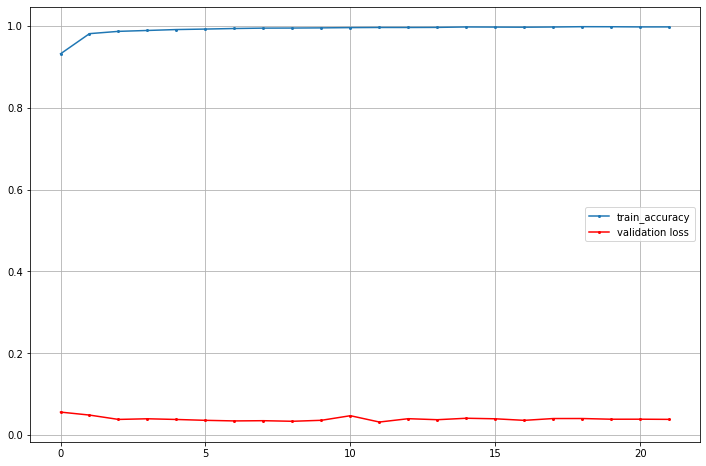

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'o-', ms=2, label='train_accuracy')
plt.plot(x_len, y_vloss, 'ro-', ms=2, label='validation loss')
plt.grid()
plt.legend()
plt.show()